# [PROTGOAT paper](https://www.biorxiv.org/content/10.1101/2024.04.01.587572v1)

## Legacy code from original github

In [1]:
# # Legacy code from orignal github
# txt_dim1 = 200
# txt_dim2 = 200

# def extract_go_terms_and_branches(file_path):
#     with open(file_path, 'r') as file:
#         content = file.read()
#         # Match each stanza with [Term] in the OBO file
#         stanzas = re.findall(r'\[Term\][\s\S]*?(?=\n\[|$)', content)

#     go_terms_dict = {}
#     for stanza in stanzas:
#         # Extract the GO term ID
#         go_id = re.search(r'^id: (GO:\d+)', stanza, re.MULTILINE)
#         if go_id:
#             go_id = go_id.group(1)

#         # Extract the namespace (branch)
#         namespace = re.search(r'^namespace: (\w+)', stanza, re.MULTILINE)
#         if namespace:
#             namespace = namespace.group(1)

#         if go_id and namespace:
#             # Map the branch abbreviation to the corresponding BPO, CCO, or MFO
#             branch_abbr = {'biological_process': 'BPO', 'cellular_component': 'CCO', 'molecular_function': 'MFO'}
#             go_terms_dict[go_id] = branch_abbr[namespace]

#     return go_terms_dict

# def get_constr_out(x, R):
#     """ Given the output of the neural network x returns the output of MCM given the hierarchy constraint expressed in the matrix R """
#     c_out = tf.cast(x, tf.float32)
#     print('c_out1', c_out.shape)
#     c_out = tf.expand_dims(c_out, 1)
#     print('c_out2', c_out.shape)
#     c_out = tf.tile(c_out, [1, tf.shape(R)[1], 1])
#     print('c_out3', c_out.shape)
#     # c_out = tf.expand_dims(c_out, -2)  # Expand the last dimension of c_out
#     # print('c_out2', c_out.shape)
#     # c_out = tf.tile(c_out, [1, tf.shape(R)[1]], 1)  # Make c_out match the shape of R
#     # print('c_out3', c_out.shape)
#     R = tf.cast(R, tf.float32)
#     print('R', R.shape)
#     R = tf.expand_dims(R, axis=0)  # make R 3D by adding an extra dimension
#     print('R', R.shape)
#     R_batch = tf.tile(R, [tf.shape(x)[0], 1, 1])  # replicate R along the batch dimension
#     print('R_batch', R_batch.shape)
#     print(R_batch[0][50][0:50])
#     print(c_out[0][0][:50])
#     final_out = tf.reduce_max(R_batch * c_out, axis=2)
#     print('final_out', final_out.shape)
#     return final_out


# class CustomMCM(Loss):
#     def __init__(self, R, name="custom_mcm"):
#         super().__init__(name=name)
#         self.R = tf.cast(R, tf.float32)

#     def call(self, y_true, y_pred):
#         constr_output = get_constr_out(y_pred, self.R)
#         y_true = tf.cast(y_true, tf.float32)
#         print('yt, yp, c_out', y_true.shape, y_pred.shape, constr_output.shape)

#         train_output = y_true * y_pred
#         print('train_output1', train_output.shape)

#         train_output = get_constr_out(train_output, self.R)
#         print('train_output2', train_output.shape)

#         train_output = (1-y_true)*constr_output + y_true*train_output
#         print('train_output3', train_output.shape)

#         # return binary cross entropy loss
#         # return K.mean(K.binary_crossentropy(y_true, train_output), axis=-1) #this does not make things better -1 -> -2
#         return tf.keras.losses.binary_crossentropy(y_true, train_output)

# class ProteinPredictions:
#     # Initialize an empty dictionary to store the predictions
#     def __init__(self):
#         self.predictions = {}

#     # Add a prediction to the storage, with optional bonus
#     # Arguments:
#     #   - protein: Identifier for the protein
#     #   - go_term: GO term that is being predicted
#     #   - score: Confidence score of the prediction
#     #   - branch: Branch of the Gene Ontology (e.g., 'CCO', 'MFO', 'BPO')
#     #   - bonus: Optional bonus to be added to the score
#     def add_prediction(self, protein, go_term, score, branch, bonus=1, adjustment=1):
#         # If the protein is not already in the storage, initialize its structure
#         if protein not in self.predictions:
#             self.predictions[protein] = {'CCO': {}, 'MFO': {}, 'BPO': {}}

#         # Convert the score to a float for comparison and calculation
#         score = float(score)

#         # If this GO term has already been predicted for this protein and branch,
#         # add the bonus to the score. Keep the highest score.
#         if go_term in self.predictions[protein][branch]:
#             self.predictions[protein][branch][go_term] *= 1+(score**3)*bonus
#             self.predictions[protein][branch][go_term] += score*adjustment

#         # If this GO term has not been predicted yet, store it with the score
#         else:
#             self.predictions[protein][branch][go_term] = max(score*adjustment, 0)

#         # Ensure that the score does not exceed 1
#         if self.predictions[protein][branch][go_term] > 1:
#             self.predictions[protein][branch][go_term] = 1

#     # Get a list of all scores in the predictions
#     def get_scores(self):
#         scores = []
#         for protein, branches in self.predictions.items():
#             for branch, go_terms in branches.items():
#                 scores.extend(go_terms.values())
#         return scores

#     def plot_predictions(self):
#         scores = self.get_scores()
#         plt.hist(scores, bins=30, edgecolor='black')
#         plt.title('Distribution of Prediction Scores')
#         plt.xlabel('Score')
#         plt.ylabel('Frequency')
#         plt.show()

#     # Export the stored predictions to a file
#     # Arguments:
#     #   - output_file: File name for the exported predictions
#     #   - top: Number of top predictions to export for each protein and branch
#     def get_predictions(self, output_file='submission.tsv', top=60):
#         # Open the output file
#         with open(output_file, 'w') as f:
#             # Iterate through each protein and its branches
#             for protein, branches in self.predictions.items():
#                 # For each branch, sort the GO terms by score in descending order and select the top ones
#                 for branch, go_terms in branches.items():
#                     # Sort go_terms by score in descending order and take the top ones
#                     top_go_terms = sorted(go_terms.items(), key=lambda x: x[1], reverse=True)[:top]
#                     # Write each of the top predictions to the file
#                     for go_term, score in top_go_terms:
#                         f.write(f"{protein}\t{go_term}\t{score:.3f}\n")

# file_path = os.path.join(TRAIN_DIR, 'go-basic.obo')
# go_terms_dict = extract_go_terms_and_branches(file_path)

In [2]:
# class TrainingDataPreparation:
#     """Prepares training data depending on which ontology is being looked at"""

#     def __init__(self, ontology: str, verbose: bool = False):
#         self.ontology = ontology
#         self.verbose = verbose

#     def load_Y_data(self):

#         if self.ontology not in N_EXTRACTED_TERMS.keys():
#             print('Error: ontology not recognized')
#             return None, None, None
        
#         # Set up file paths
#         onto_abbr = self.ontology[:2]
#         n_extracted_terms = N_EXTRACTED_TERMS[self.ontology]

#         Y_filepath = os.path.join(EMBEDDING_DIR, f'Y_{onto_abbr}_{n_extracted_terms}.npy')
#         Y_labels_filepath = os.path.join(EMBEDDING_DIR, f'Y_{onto_abbr}_labels_{n_extracted_terms}.npy')
#         df_filepath = os.path.join(EMBEDDING_DIR, f'{self.ontology}_{n_extracted_terms}_freq_weights.csv')

#         # Load data
#         Y = np.load(Y_filepath, allow_pickle=True)
#         Y_labels = np.load(Y_labels_filepath, allow_pickle=True)
#         df = pd.read_csv(df_filepath)
#         weights_raw = df['IA_weight'].values.tolist()
#         weights = {i: weights_raw[i] for i in range(len(weights_raw))}
        
#         if self.verbose:
#             print(f'Loaded {self.ontology} ontology')

#         return Y, Y_labels, weights, df

#     def load_t5_data(self):
#         train_data1 = np.load(os.path.join(EMBEDDING_DIR, 't5_train_data_sorted_f32.npy'), mmap_mode='r')
#         test_data1 = np.load(os.path.join(EMBEDDING_DIR, 't5_test_data_sorted_f32.npy'), mmap_mode='r')
#         if self.verbose:
#             print(f'T5 train data shape: {train_data1.shape}')
#             print(f'T5 test data shape: {test_data1.shape}')

#         return train_data1, test_data1

#     def load_esm2_s_data(self):
#         train_data2 = np.load(os.path.join(EMBEDDING_DIR, 'esm2_train_data_sorted_f32.npy'), mmap_mode='r')
#         test_data2 = np.load(os.path.join(EMBEDDING_DIR, 'esm2_test_data_sorted_f32.npy'), mmap_mode='r')
#         if self.verbose:
#             print(f'ESM2 small train data shape: {train_data2.shape}')
#             print(f'ESM2 small test data shape: {test_data2.shape}')

#         return train_data2, test_data2

#     def load_esm2_l_data(self):
#         train_data3 = np.load(os.path.join(EMBEDDING_DIR, 'ESM2_3B_train_embeddings_sorted.npy'), mmap_mode='r')
#         test_data3 = np.load(os.path.join(EMBEDDING_DIR, 'ESM2_3B_test_embeddings_sorted.npy'), mmap_mode='r')
#         if self.verbose:
#             print(f'ESM2 3B train data shape: {train_data3.shape}')
#             print(f'ESM2 3B data shape: {test_data3.shape}')

#         return train_data3, test_data3

#     def load_pb_data(self):
#         train_data4 = np.load(os.path.join(EMBEDDING_DIR, 'pb_train_data_sorted_f32.npy'), mmap_mode='r')
#         test_data4 = np.load(os.path.join(EMBEDDING_DIR, 'pb_test_data_sorted_f32.npy'), mmap_mode='r')
#         if self.verbose:
#             print(f'PB train data shape: {train_data4.shape}')
#             print(f'PB data shape: {test_data4.shape}')

#         return train_data4, test_data4

#     def load_ankh_data(self):
#         train_data5 = np.load(os.path.join(EMBEDDING_DIR, 'Ankh_train_embeddings_sorted.npy'), mmap_mode='r')
#         test_data5 = np.load(os.path.join(EMBEDDING_DIR, 'Ankh_test_embeddings_sorted.npy'), mmap_mode='r')
#         if self.verbose:
#             print(f'Ankh train data shape: {train_data5.shape}')
#             print(f'Ankh data shape: {test_data5.shape}')

#         return train_data5, test_data5

#     def load_taxa_data(self):
#         train_data6 = np.load(os.path.join(EMBEDDING_DIR, 'protein_taxa_matrix_train.npy'), mmap_mode='r')
#         test_data6 = np.load(os.path.join(EMBEDDING_DIR, 'protein_taxa_matrix_test.npy'), mmap_mode='r')
        
#         train_data6 = np.expand_dims(train_data6, axis=1)
#         test_data6 = np.expand_dims(test_data6, axis=1)
#         if self.verbose:
#             print(f'Taxa train data shape: {train_data6.shape}')
#             print(f'Taxa data shape: {test_data6.shape}')

#         return train_data6, test_data6

#     def load_text_embed(self):
        
#         train_data7 = np.load(os.path.join(EMBEDDING_DIR, 'Text_abstract_embeds_train_sorted.npy'), mmap_mode='r')
#         test_data7 = np.load(os.path.join(EMBEDDING_DIR, 'Text_abstract_embeds_test_sorted.npy'), mmap_mode='r')
#         if self.verbose:
#             print(f'Text abstract data shape: {train_data7.shape}')
#             print(f'Text abstract shape: {test_data7.shape}')

#         return train_data7, test_data7

## Project Scaffolding

### Imports and Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import itertools
import functools
import os
import gc

from dataclasses import dataclass, field
from enum import Enum
from pathlib import Path

from typing import Dict, Callable, Sequence, Iterable, Iterator, Tuple, Optional, Any
from numpy.typing import NDArray, ArrayLike, DTypeLike
from sklearn.model_selection._split import _BaseKFold

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, Callback, CSVLogger
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Concatenate, Input, ReLU, MultiHeadAttention
from tensorflow.keras.utils import plot_model, register_keras_serializable, set_random_seed

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Loss
from tensorflow.keras.constraints import max_norm


from supcon.losses import ContrastiveLoss


import keras.backend as K

from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, TimeSeriesSplit
from sklearn.metrics import roc_auc_score, multilabel_confusion_matrix, precision_recall_curve, auc

# Evaluation for CAFA5
import cafaeval
from cafaeval.evaluation import cafa_eval, write_results

# from sklearn.linear_model import Ridge, LinearRegression
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neural_network import MLPRegressor
# from scipy.stats import rankdata, norm
# from scipy.sparse import load_npz

# Self-defined modules
import preprocess
from parameters import CrossValidationParameters, TrainingParameters, ModelParameters, ContrastiveModelParameters, ContrastiveTrainingParameters

# Cell Output Formatting
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Custom Types
KFoldSplitIndicesTuple = Tuple[int, Tuple[NDArray[int], NDArray[int]]]

# Force to use CPU!!
tf.config.set_visible_devices([], 'GPU')
# print(tf.config.list_physical_devices())

/Users/chrislin/miniconda3/envs/cafa-5/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
# Project directories
EMBEDDING_DIR = "PROTGOAT_embeddings"
TRAIN_DIR = "Train"
TEST_DIR = "Test (Targets)"
MODEL_SAVE_DIR = "models"
MODEL_LOGS_SAVE_DIR = "model_logs"
PREDICTION_DIR = "predictions"
SUBMISSION_DIR = "final_submissions"

# Utility constants
BRANCH_ABBR = {'biological_process': 'BPO', 'cellular_component': 'CCO', 'molecular_function': 'MFO'}
N_EXTRACTED_TERMS = {"BPO": 1500, "CCO": 800, "MFO": 800}
MODEL_FILENAME_TEMPLATE = "{model_name}_{ontology}_fc{fold_ct}_r{rand_seed}"
MODEL_CV_FILENAME_TEMPLATE = "{model_name}_{ontology}_fc{fold_ct}_r{rand_seed}_cv"
MODEL_TSS_FILENAME_TEMPLATE = "{model_name}_{ontology}_r{rand_seed}_tss"

ONTOLOGY_SUBMISSION_TEMPLATE = "{ontology}_{model_name}.tsv"
ONTOLOGY_FOLD_PREDICTION_TEMPLATE = "{ontology}_{model_name}_{fold_ct}.tsv"
ONTOLOGY_TSS_PREDICTION_TEMPLATE = "{ontology}_{model_name}_tss.tsv"

### Create missing data in PROTGOAT

In [3]:
# # Read in train data
# train_sequences_fasta, train_taxonomy, train_terms, go_graph, information_accretion = preprocess.load_train_data(TRAIN_DIR)
# # Read in test data
# test_sequences_fasta, test_taxonomy = preprocess.load_test_data(TEST_DIR)

In [4]:
# go_terms_ontology = {}
# for go_id, go_node in go_graph.nodes.items():    
#     go_terms_ontology[go_id] = BRANCH_ABBR[go_node["namespace"]]

# len(go_terms_ontology) # 43248
# len(go_terms_dict)     # 47417

Create `"*_*_freq_weights.csv"` data

In [5]:
# # Get the weights: freq * IA
# train_terms_IA_freq = (
#     train_terms
#     .groupby(["aspect", "term"])["EntryID"].count()
#     .reset_index()
#     .rename(columns={"EntryID": "freq"})
#     .merge(information_accretion, left_on="term", right_on="GO_term")
#     [["aspect", "GO_term", "freq", "IA"]]
#     .pipe(lambda df: df.assign(IA_weight=df.IA * df.freq))
# )

# # Write to files for each aspect
# for aspect, n_terms in N_EXTRACTED_TERMS.items():
#     save_filename = os.path.join(EMBEDDING_DIR, f"{aspect}_{n_terms}_freq_weights.csv")
#     train_terms_IA_freq.query("aspect == @aspect").nlargest(n_terms, columns="IA_weight").to_csv(save_filename)

Create `protein_taxa_matrix_*` data

In [6]:
# # Preprocess the train sequences
# train_sequences = preprocess.create_sequence_dataframe_from_fasta(train_sequences_fasta)
# train_sequences = preprocess.augment_train_features_from_fasta_description(train_sequences)
# train_sequences = train_sequences.merge(train_taxonomy, on="EntryID", how="left").drop_duplicates()

# # Preprocess the test sequences
# test_sequences = preprocess.create_sequence_dataframe_from_fasta(test_sequences_fasta)
# test_sequences = preprocess.augment_test_features_from_fasta_description(test_sequences)
# test_sequences = test_sequences.merge(test_taxonomy, on="ID", how="left").drop_duplicates()

# print(f"{train_sequences.shape = }")
# print(f"{test_sequences.shape = }")

In [7]:
# # Write to files
# with open(os.path.join(EMBEDDING_DIR, 'protein_taxa_matrix_train.npy'), 'wb') as f:
#     np.save(f, train_sequences.taxonomyID.values)

# with open(os.path.join(EMBEDDING_DIR, 'protein_taxa_matrix_test.npy'), 'wb') as f:
#     np.save(f, test_sequences.ID.values)

## Data Preparation

In [8]:
# train_sequences = preprocess.get_train_sequences(TRAIN_DIR)

# train_percentage = 0.6
# val_percentage = 0.2

# time_series_batch_split = (
#     train_sequences
#     .dropna(subset="first_release")
#     .sort_values("first_release")
#     .groupby("first_release")[["EntryID"]].count()
#     .rename(columns={"EntryID": "n_released"})
#     .assign(
#         cum_pct=lambda df: df.cumsum() / df.sum(),
#         tss_train=lambda df: df.cum_pct <= train_percentage,
#         tss_val=lambda df: (train_percentage < df.cum_pct) & (df.cum_pct <= train_percentage + val_percentage)
#     )
# )

# # To check the split data percentages
# (
#     train_sequences
#     .merge(time_series_batch_split[["tss_train", "tss_val"]], left_on="first_release", right_index=True, how="left")
#     [["tss_train", "tss_val"]]
#     .value_counts()
#     .to_frame()
#     .reset_index()
#     .pipe(lambda df: df.assign(pct=df["count"] / df["count"].sum()))
# )

In [3]:
@dataclass
class OntologyData:
    """A data-oriented class to load and hold data for a specified ontology"""

    ontology: str                                                # BPO, MFO, CCO
    verbose: bool = False
    n_terms: int = field(init=False)                             # The number of GO terms considered for this ontology (1500, 800, 800)

    # Training data
    train_sequences: pd.DataFrame = field(init=False)            # The original training data (with release dates)              (len = N)
    train_structures: NDArray[float] = field(init=False)
    X_labels: NDArray[str] = field(init=False)                   # The string EntryID labels of the training sequences          (len = N)

    Y: NDArray[NDArray[np.int8]] = field(init=False)             # The one-hot-like multi-labeled ground truths  (N, n_terms)
    Y_labels: NDArray[str] = field(init=False)                   # The string labels of the training GO terms    (n_terms,)

    weights: Dict[int, float] = field(init=False)
    _df_freq_weights: pd.DataFrame = field(init=False)

    # Kaggle testing data (Not used)
    # test_labels: NDArray = field(init=False)                     # (Not used) The string labels of the testing GO terms for Kaggle
    # test_embeddings: Iterable[np.memmap] = field(init=False)     # (Not used) Testing sequence embeddings for Kaggle
    

    def __post_init__(self):
        """Automatically load the data"""
        self.n_terms = N_EXTRACTED_TERMS[self.ontology]

        self.train_sequences = self.add_tss_split_to_data(preprocess.get_train_sequences(TRAIN_DIR))
        ## load the struct data whose order aligns with train sequences ##
        self.train_structures = preprocess.load_struct_embed(EMBEDDING_DIR)
        self.X_labels = self.train_sequences["EntryID"].values
        # self.test_labels = np.load(os.path.join(EMBEDDING_DIR, 't5_test_labels_sorted.npy'))

        # Load the PROTGOAT embeddings
        self.Y, self.Y_labels, self.weights, self._df_freq_weights = preprocess.load_Y_data(self.ontology, EMBEDDING_DIR)
        self.t5_train, self.t5_test = preprocess.load_t5_data(EMBEDDING_DIR)
        self.esm1_train, self.esm1_test = preprocess.load_esm2_s_data(EMBEDDING_DIR)
        self.esm2_train, self.esm2_test = preprocess.load_esm2_l_data(EMBEDDING_DIR)
        self.pb_train, self.pb_test = preprocess.load_pb_data(EMBEDDING_DIR)
        self.ankh_train, self.ankh_test = preprocess.load_ankh_data(EMBEDDING_DIR)
        self.taxa_train, self.taxa_test = preprocess.load_taxa_data(EMBEDDING_DIR)

        # txt1_train, txt1_test = data_prep.load_text_embed()
        # if self.ontology == 'CCO':
        #     R = np.load(os.path.join(EMBEDDING_DIR, 'CCO_800_DAG_matrix.npy'))
        #     output_split = [4, 11, 24, 59, 199]

        # elif self.ontology == 'MFO':
        #     R = np.load(os.path.join(EMBEDDING_DIR, 'MFO_800_DAG_matrix.npy'))
        #     output_split = [4, 14, 28, 69, 176]

        # elif self.ontology == 'BPO':
        #     R = np.load(os.path.join(EMBEDDING_DIR, 'BPO_1500_DAG_matrix.npy'))
        #     output_split = [13, 45, 102, 213, 465]

        if self.verbose:
            # print (f'R shape is {R.shape}')
            print('datasets loaded')
            print(f'Number of proteins with no {self.ontology} terms = {np.sum(np.all(self.Y == 0, axis=1))} out of {self.Y.shape[0]}')

    
    def _get_data_by_indices(self, filter_indices: Sequence[int]):
        # Filter out rows in Y
        Y_subset = self.Y[filter_indices]

        # Filter out rows in other input arrays
        t5_subset = self.t5_train[filter_indices]
        esm1_subset = self.esm1_train[filter_indices]
        esm2_subset = self.esm2_train[filter_indices]
        pb_subset = self.pb_train[filter_indices]
        ankh_subset = self.ankh_train[filter_indices]
        taxa_subset = self.taxa_train[filter_indices]

        struct_subset = self.train_structures[filter_indices]

        X_labels_subset = self.X_labels[filter_indices]

        return (t5_subset, esm1_subset, esm2_subset, pb_subset, ankh_subset, taxa_subset, struct_subset), X_labels_subset, Y_subset


    def get_data(self):
        self.valid_rows = ~np.all(self.Y == 0, axis=1)
        self.embeddings, self.X_labels, self.Y = self._get_data_by_indices(self.valid_rows)
        return self.embeddings, self.test_embeddings, (self.Y, self.Y_labels, self.weights)
    

    def get_tss_data(self):

        ### Filter the data ###
        belongs_to_this_ontology: NDArray[bool] = ~np.all(self.Y == 0, axis=1)   # Only those containing GO terms in this ontology
        contains_annotation_dates: NDArray[bool] = self.train_sequences.first_release.notna().values
        remove_zero_struct: NDArray[bool] = np.any(self.train_structures != 0, axis=1)
        self.valid_rows = belongs_to_this_ontology & contains_annotation_dates & remove_zero_struct

        # Split the data into train, val, test set
        is_train_in_tss = self.train_sequences.tss_train.fillna(False).values
        is_val_in_tss = self.train_sequences.tss_val.fillna(False).values
        is_test_in_tss = ~is_train_in_tss & ~is_val_in_tss & contains_annotation_dates

        self.train_rows = self.valid_rows & is_train_in_tss
        self.val_rows = self.valid_rows & is_val_in_tss
        self.test_rows = self.valid_rows & is_test_in_tss

        if self.verbose:
            print(f'we retained {self.train_rows.sum()} proteins in training set where {self.ontology} terms are present')
            print(f'we retained {self.val_rows.sum()} proteins in validation set where {self.ontology} terms are present')
            print(f'we retained {self.test_rows.sum()} proteins in testing set where {self.ontology} terms are present')

        return (
            self._get_data_by_indices(self.train_rows),
            self._get_data_by_indices(self.val_rows),
            self._get_data_by_indices(self.test_rows),
            (self.Y_labels, self.weights)
        )
    

    def get_cv_split_data(
            self, 
            cv_params: CrossValidationParameters, 
            cv_splitter_class: _BaseKFold = KFold,
            val_size: float = 0.2,
        ) -> Iterator[KFoldSplitIndicesTuple]:
        """This method is deprecated for now."""
        
        # Set up the cross-validation splitter
        cv_splitter = cv_splitter_class(**cv_params._asdict())
        split_enumerator: Iterator[KFoldSplitIndicesTuple] = enumerate(
            cv_splitter.split(self.embeddings[0]), start=1
        )

        cv_fold_data = []
        for fold_ct, (train_val_index, test_index) in split_enumerator:

            # Split the embeddings and labels into train & test set
            X_train_vals, X_tests = self.split_X_data(train_val_index, test_index, self.embeddings)
            y_train_val, y_test = self.split_y_data(train_val_index, test_index, self.Y)

            # Continue to split data into train & val set
            train_index, val_index = train_test_split(np.arange(len(train_val_index)), 
                                                      test_size=val_size, random_state=cv_params.random_state)
            X_trains, X_vals = self.split_X_data(train_index, val_index, X_train_vals)
            y_train, y_val = self.split_y_data(train_index, val_index, y_train_val)
            
            cv_fold_data.append((fold_ct, X_trains, y_train, X_vals, y_val, X_tests, y_test))

        return cv_fold_data
    

    @staticmethod
    def add_tss_split_to_data(train_sequences, train_percentage = 0.6, val_percentage = 0.2):
        """Split the data by annotation dates"""

        time_series_batch_split = (
            train_sequences
            .dropna(subset="first_release")
            .sort_values("first_release")
            .groupby("first_release")[["EntryID"]].count()
            .rename(columns={"EntryID": "n_released"})
            .assign(
                cum_pct=lambda df: df.cumsum() / df.sum(),
                tss_train=lambda df: df.cum_pct <= train_percentage,
                tss_val=lambda df: (train_percentage < df.cum_pct) & (df.cum_pct <= train_percentage + val_percentage)
            )
        )

        return (
            train_sequences
            .merge(time_series_batch_split[["tss_train", "tss_val"]], 
                   left_on="first_release", right_index=True, how="left")
        )
        

    @staticmethod
    def split_X_data(
            train_index: Sequence[int], 
            val_index: Sequence[int], 
            embeddings: Sequence[np.array],
        ) -> Tuple[list[np.array], list[np.array]]:

        X_trains = []
        X_vals = []
        for embedding in embeddings:
            X_train, X_val = embedding[train_index], embedding[val_index]
            X_trains.append(X_train)
            X_vals.append(X_val)

        return X_trains, X_vals

    @staticmethod
    def split_y_data(train_index: Sequence[int], val_index: Sequence[int], Y: np.array):
        return Y[train_index], Y[val_index]
    

    def check_shapes(self) -> None:
        print(f"{self.Y.shape = }")
        print(f"{self.Y_labels.shape = }")

        print("embeddings:")
        for embed in self.embeddings:
            print(embed.shape)

        print("test_embeddings:")
        for embed in self.test_embeddings:
            print(embed.shape)

In [4]:
def postprocess_predictions_for_one_ontology(
        predictions: NDArray[NDArray],          # Predictions
        Y_labels: NDArray[str],                 # GO term string labels
        protein_ids: Optional[Sequence[str]] = None,      # EntryIDs of proteins in test data
        top_percent: float = 1.0, 
        dropzeros: bool = True, 
        verbose: bool = False,
    ) -> pd.DataFrame:
    """Keep only top 5% predictions as the final predictions for the given ontology"""

    # Prepare dataframe for submission
    test_size = predictions.shape[0]
    n_extracted_terms_from_current_ontology = predictions.shape[1]
    if protein_ids is None:
        protein_ids = np.arange(test_size)

    submission_df = pd.DataFrame({
        "Protein Id": np.repeat(protein_ids, n_extracted_terms_from_current_ontology),
        "GO Term Id": np.tile(Y_labels, test_size),
        "Prediction": predictions.ravel(),
    })

    # Select the top 5% rows based on 'Prediction'
    top_rows = int(top_percent * submission_df.shape[0])
    submission_df = submission_df.nlargest(top_rows, 'Prediction')

    # Drop rows where 'Prediction' is equal or less than zero
    if dropzeros:
        epsilon = 0.0001
        if verbose:
            print('zeros dropped for', len(submission_df[submission_df['Prediction'] <= epsilon]), 'rows')
        submission_df = submission_df[submission_df['Prediction'] > epsilon]

    # Round to 4 decimals: Differences below 4 decimals are negligible
    submission_df['Prediction'] = submission_df['Prediction'].round(4)

    return submission_df

## Model Building

### Define Input Processing Layers

In [5]:
class ComposableLayer(tf.keras.layers.Layer):
    """A base layer class that provides composition of sequential layers"""
    
    @staticmethod
    def compose_layers(layers: Iterable[tf.keras.layers.Layer], **kwargs) -> tf.keras.layers.Layer:
        return tf.keras.layers.Lambda(
            lambda x: functools.reduce(lambda tensor, layer: layer(tensor), layers, x),
            **kwargs,
        )

@register_keras_serializable()
class BranchLayers(tf.keras.layers.Layer):
    """Create an encoding branch/block to process a given embeddings"""
    
    def __init__(self, l1_dim=600, l2_dim=300, dropout_rate=0.5, alpha=0.1, name_prefix="", **kwargs):
        super(BranchLayers, self).__init__(**kwargs)
        self.l1_dim = l1_dim
        self.l2_dim = l2_dim
        self.dropout_rate = dropout_rate
        self.alpha = alpha
        self.prefix = f"{name_prefix}_" if name_prefix else ""

    def build(self, input_shape):
        """Create the weights and build the layers (after the input shape is known)"""
        self.dense_1 = Dense(self.l1_dim, name=f'{self.prefix}dense_1')
        self.batch_norm_1 = BatchNormalization(name=f'{self.prefix}batchnorm_1')
        self.leaky_relu_1 = LeakyReLU(alpha=self.alpha, name=f'{self.prefix}leakyrelu_1')
        self.drop_out_1 = Dropout(self.dropout_rate, name=f'{self.prefix}dropout_1')
        self.dense_2 = Dense(self.l2_dim, name=f'{self.prefix}dense_2')
        super(BranchLayers, self).build(input_shape)

    def call(self, inputs):
        hidden = self.dense_1(inputs)
        hidden = self.batch_norm_1(hidden)
        hidden = self.leaky_relu_1(hidden)
        hidden = self.drop_out_1(hidden)
        hidden = self.dense_2(hidden)
        return hidden

    def get_config(self):
        config = super(BranchLayers, self).get_config()
        config.update({
            'l1_dim': self.l1_dim,
            'l2_dim': self.l2_dim,
            'dropout_rate': self.dropout_rate,
            'alpha': self.alpha,
        })
        return config

### Define PROTGOAT model

In [6]:
@register_keras_serializable()
class ProtgoatEnsembleBlock(tf.keras.layers.Layer):
    """Create an ensemble block to merge all embeddings"""
    
    def __init__(self, final_dim, **kwargs):
        super(ProtgoatEnsembleBlock, self).__init__(**kwargs)
        self.final_dim = final_dim

    def build(self, input_shape):
        """Create the weights and build the layers (after the input shape is known)"""
        self.batch_norm_1 = BatchNormalization(name = 'combined_batchnorm_1')
        self.classifier = Dense(self.final_dim, name='combined_dense_1', activation='relu')
        super(ProtgoatEnsembleBlock, self).build(input_shape)

    def call(self, inputs):
        return self.classifier(self.batch_norm_1(inputs))

In [7]:
def create_PROTGOAT(
        t5_train: np.array,
        esm1_train: np.array,
        esm2_train: np.array,
        pb_train: np.array,
        ankh_train: np.array,
        taxa_train: np.array,
        model_params: ModelParameters,
        output_shape: int,
    ):

    # Define the inputs
    t5_in = Input(shape=(t5_train.shape[1],), name = 't5_input')
    esm1_in = Input(shape=(esm1_train.shape[1],), name = 'esm1_input')
    esm2_in = Input(shape=(esm2_train.shape[1],), name = 'esm2_input')
    pb_in = Input(shape=(pb_train.shape[1],), name = 'pb_input')
    ankh_in = Input(shape=(ankh_train.shape[1],), name = 'ankh_input')
    taxa_in = Input(shape=(taxa_train.shape[1],), name = 'taxa_input')

    # Define the branches for each inputs
    t5_branch = BranchLayers(**model_params.branch_kwargs, name_prefix="t5")
    esm1_branch = BranchLayers(**model_params.branch_kwargs, name_prefix="esm1")
    esm2_branch = BranchLayers(**model_params.branch_kwargs, name_prefix="esm2")
    pb_branch = BranchLayers(**model_params.branch_kwargs, name_prefix="pb")
    ankh_branch = BranchLayers(**model_params.branch_kwargs, name_prefix="ankh")
    taxa_branch = BranchLayers(**model_params.branch_kwargs, name_prefix="taxa")

    # Defined the ensembling block
    ensemble = ProtgoatEnsembleBlock(model_params.final_dim)

    # Build the branches' weights
    t5_branch.build(input_shape=(t5_train.shape[1],))
    esm1_branch.build(input_shape=(esm1_train.shape[1],))
    esm2_branch.build(input_shape=(esm2_train.shape[1],))
    pb_branch.build(input_shape=(pb_train.shape[1],))
    ankh_branch.build(input_shape=(ankh_train.shape[1],))
    taxa_branch.build(input_shape=(taxa_train.shape[1],))

    # Build the ensemble' weights
    combined_shape = sum(data.shape[1] for data in [t5_train, esm1_train, esm2_train, pb_train, ankh_train, taxa_train])
    ensemble.build(input_shape=(combined_shape,))
    
    # Feed the inputs into the branches
    t5_branch = t5_branch(t5_in)
    esm1_branch = esm1_branch(esm1_in)
    esm2_branch = esm2_branch(esm2_in)
    pb_branch = pb_branch(pb_in)
    ankh_branch = ankh_branch(ankh_in)
    taxa_branch = taxa_branch(taxa_in)

    # Merge the branches & output predictions
    concatenated = Concatenate()([t5_branch, esm1_branch, esm2_branch, pb_branch, ankh_branch, taxa_branch])
    ensembled = ensemble(concatenated)
    output = Dense(output_shape, activation='sigmoid', name='final_output')(ensembled)

    # Create the model
    return Model(inputs=[t5_in, esm1_in, esm2_in, pb_in, ankh_in, taxa_in], 
                 outputs=output)

### Define Struct PROTGOAT model

In [8]:
def create_struct_PROTGOAT(
        t5_train: np.array,
        esm1_train: np.array,
        esm2_train: np.array,
        pb_train: np.array,
        ankh_train: np.array,
        taxa_train: np.array,
        train_structures: np.array,
        model_params: ModelParameters,
        output_shape: int,
    ):

    # Define the inputs
    t5_in = Input(shape=(t5_train.shape[1],), name = 't5_input')
    esm1_in = Input(shape=(esm1_train.shape[1],), name = 'esm1_input')
    esm2_in = Input(shape=(esm2_train.shape[1],), name = 'esm2_input')
    pb_in = Input(shape=(pb_train.shape[1],), name = 'pb_input')
    ankh_in = Input(shape=(ankh_train.shape[1],), name = 'ankh_input')
    taxa_in = Input(shape=(taxa_train.shape[1],), name = 'taxa_input')

    struct_in = Input(shape=(train_structures.shape[1],),name='struct_embed')


    # Define the branches for each inputs
    t5_branch = BranchLayers(**model_params.branch_kwargs, name_prefix="t5")
    esm1_branch = BranchLayers(**model_params.branch_kwargs, name_prefix="esm1")
    esm2_branch = BranchLayers(**model_params.branch_kwargs, name_prefix="esm2")
    pb_branch = BranchLayers(**model_params.branch_kwargs, name_prefix="pb")
    ankh_branch = BranchLayers(**model_params.branch_kwargs, name_prefix="ankh")
    taxa_branch = BranchLayers(**model_params.branch_kwargs, name_prefix="taxa")

    struct_branch=BranchLayers(**model_params.branch_kwargs, name_prefix="struct")

    # Defined the ensembling block
    ensemble = ProtgoatEnsembleBlock(model_params.final_dim)

    # Build the branches' weights
    t5_branch.build(input_shape=(t5_train.shape[1],))
    esm1_branch.build(input_shape=(esm1_train.shape[1],))
    esm2_branch.build(input_shape=(esm2_train.shape[1],))
    pb_branch.build(input_shape=(pb_train.shape[1],))
    ankh_branch.build(input_shape=(ankh_train.shape[1],))
    taxa_branch.build(input_shape=(taxa_train.shape[1],))
    
    struct_branch.build(input_shape=(train_structures.shape[1],))

    # Build the ensemble' weights
    combined_shape = sum(data.shape[1] for data in [t5_train, esm1_train, esm2_train, pb_train, ankh_train, taxa_train])
    ensemble.build(input_shape=(combined_shape,))

    # Feed the inputs into the branches
    t5_branch = t5_branch(t5_in)
    esm1_branch = esm1_branch(esm1_in)
    esm2_branch = esm2_branch(esm2_in)
    pb_branch = pb_branch(pb_in)
    ankh_branch = ankh_branch(ankh_in)
    taxa_branch = taxa_branch(taxa_in)

    struct_branch = struct_branch(struct_in)

    # Merge the branches & output predictions
    concatenated = Concatenate()([t5_branch, esm1_branch, esm2_branch, pb_branch, ankh_branch, taxa_branch])
    ensembled = ensemble(concatenated)

    final_embedding = Concatenate()([ensembled, struct_branch])
    last_hidden_state = BranchLayers(**model_params.branch_kwargs, name_prefix="final_mlp")(final_embedding)
    output = Dense(output_shape, activation='sigmoid', name='final_output')(last_hidden_state)


    # print("Shape after t5_branch:", t5_branch.shape)
    # print("Shape after concatenation:", concatenated.shape)
    # print("Shape after final mlp branch:", last_hidden_state.shape)

    model = Model(inputs=[t5_in, esm1_in, esm2_in, pb_in, ankh_in, taxa_in, struct_in], outputs=output)
    # print(model.summary())
    return model



    # # Create the model
    # #return Model(inputs=[t5_in, esm1_in, esm2_in, pb_in, ankh_in, taxa_in,struct_in],
    #              outputs=output)

In [9]:
ontology_data = OntologyData("CCO", verbose=True)
train_set, val_set, test_set, (GO_labels, weights) = ontology_data.get_tss_data()

X_trains, X_labels_train, y_train = train_set
X_vals, X_labels_val, y_val = val_set
X_tests, X_labels_test, y_test = test_set

datasets loaded
Number of proteins with no CCO terms = 48882 out of 142246
we retained 32431 proteins in training set where CCO terms are present
we retained 11146 proteins in validation set where CCO terms are present
we retained 10909 proteins in testing set where CCO terms are present


Shape after t5_branch: (None, 300)
Shape after concatenation: (None, 1800)
Shape after final mlp branch: (None, 300)


### Generate Ground Truths

In [39]:
# conbined_gt = []
# for gt in ground_truths:
#     cleaned = (
#         gt.stack()
#         .to_frame().reset_index()
#         .rename(columns={0: "value"})
#         .query("value == 1")
#         .drop(columns="value")
#     )
#     conbined_gt.append(cleaned)
# pd.concat(conbined_gt).to_csv("struct_protgoat_ground_truths.tsv", header=False, index=False, sep="\t")

### Define PROTGOAT+CT model

This loss comes from the [Supervised Contrastive Learning paper](https://paperswithcode.com/paper/supervised-contrastive-learning), which is implemented by [Google Research](https://github.com/google-research/google-research/blob/master/supcon/losses.py).

In [43]:
# Must use tensorflow==2.15.1 to use tfa in this code, but that would break the Lambda layer above

class SupervisedContrastiveLoss(tf.keras.losses.Loss):
    def __init__(self, temperature=1, name=None):
        super().__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        print(f"{labels.shape = }")
        print(f"{feature_vectors.shape = }")

        # Normalize feature vectors
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        # Compute logits
        logits = tf.divide(
            tf.matmul(
                feature_vectors_normalized, tf.transpose(feature_vectors_normalized)
            ),
            self.temperature,
        )
        print(f"{feature_vectors_normalized.shape = }")
        print(f"{logits.shape = }")
        print(f"{tf.squeeze(labels).shape = }")

        return tfa.losses.npairs_loss(tf.squeeze(labels), logits)

In [44]:
def add_projection_head(encoder, ct_params: ContrastiveModelParameters):
    input_shapes = tuple(layer_config["config"]["batch_input_shape"][1] 
        for layer_config in encoder.get_config()["layers"] 
        if layer_config["class_name"] == "InputLayer"
    )
    input_layers = [Input(shape=shape) for shape in input_shapes]
    features = encoder(input_layers)
    outputs = Dense(ct_params.final_dim, activation="relu")(features)
    model = Model(
        inputs=input_layers, outputs=outputs, name="contrastive-encoder-with-projection-head"
    )
    return model

In [45]:
def add_classifier(encoder, num_classes: int, ct_params: ContrastiveModelParameters, trainable: bool = False):

    for layer in encoder.layers:
        layer.trainable = trainable

    inputs = Input(shape=encoder.layers[-1].output_shape)
    features = encoder(inputs)
    features = Dropout(ct_params.dropout_rate_1)(features)
    features = Dense(ct_params.hidden_dim, activation="relu")(features)
    features = Dropout(ct_params.dropout_rate_1)(features)
    outputs = Dense(num_classes, activation="softmax")(features)

    model = Model(inputs=inputs, outputs=outputs, name="contrastive-classifier")
    model.compile(
        optimizer=tf.keras.optimizers.legacy.Adam(ct_params.learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

In [46]:
#lr scheduling
def lr_schedule(epoch: int, lr: float) -> float:
    if epoch > 0 and epoch % 10 == 0:
        lr = lr * 0.5
    return lr

In [127]:
# Generate pairs and labels
def generate_pairs_labels(X_list, num_anchors=1000, num_positives_per_anchor=10, num_negatives_per_anchor=100, seed=123):
    pairs = []
    labels = []
    num_rows = len(X_list[0])
    
    np.random.seed(seed)
    for _ in range(num_anchors):

        # Randomly select a pair of indices
        index_anchor, *indices_negative = np.random.choice(num_rows, size=num_negatives_per_anchor+1, replace=False)

        # Get the anchor: Take one specific row from each embeddings
        anchor = np.concatenate([X[index_anchor] for X in X_list])

        # Get (anchor, negative) pairs
        for index_negative in indices_negative:
            neg_samples = np.concatenate([X[index_negative] for X in X_list])
            pairs.append((anchor, neg_samples))
            labels.append(0)

        # Get (anchor, positive) pairs
        for _ in range(num_positives_per_anchor):
            noise = np.sign(anchor) * np.random.random(size=anchor.shape)
            pos_sample = anchor + noise
            pairs.append((anchor, pos_sample))
            labels.append(1)
    
    return pairs, labels

# Generate pairs and labels for training
# X_train_pairs, y_train_pairs = generate_pairs_labels(X_train, y_train)

In [48]:
def contrastive_loss(y_true, y_pred):
    margin = 1
    return tf.reduce_mean(y_true * tf.square(y_pred) +
                         (1 - y_true) * tf.square(tf.maximum(margin - y_pred, 0)))

In [129]:
def pretrain_contrastive_encoder(
        ct_encoder: Model, 
        X_trains: list[np.array],
        y_train: np.array,
        X_vals: list[np.array],
        y_val: np.array,
        model_savepath: Path,
        logger_savepath: Path,
        ct_params: ContrastiveModelParameters, 
        ct_train_params: ContrastiveTrainingParameters,
        lr_schedule: Callable = lr_schedule,
        lr_verbose=0, train_verbose=0, checkpoint_verbose=0,
    ):

    print("Train:", model_savepath)
    
    # Add projection head to ct_encoder
    ct_encoder_with_projection_head = add_projection_head(
        ct_encoder, 
        ct_params = ct_params,
    )

    # Set seed
    set_random_seed(ct_train_params.seed)
    
    # Define callbacks
    # early_stopping = EarlyStopping(monitor='val_loss', patience=ct_train_params.patience, verbose=1)
    checkpoint_loss = ModelCheckpoint(
        filepath = model_savepath, 
        monitor = 'val_loss', 
        verbose = checkpoint_verbose, 
        save_best_only = True, 
        save_weights_only = False, 
        mode = 'min',
    )
    csv_logger = CSVLogger(logger_savepath)
    lr_callback = LearningRateScheduler(lr_schedule, verbose=lr_verbose)

    # Compile model
    ct_encoder_with_projection_head.compile(
        optimizer=tf.keras.optimizers.legacy.Adam(ct_train_params.learning_rate),
        loss=contrastive_loss,# SupervisedContrastiveLoss(ct_train_params.temperature),
        metrics = ['binary_accuracy', tf.keras.metrics.AUC()]
    )
    # print()
    # print(len(X_trains))
    # print([x.shape for x in X_trains])
    # print(f"{y_train.shape = }")
    # print(len(X_vals))
    # print([x.shape for x in X_vals])
    # print(f"{y_val.shape = }")

    # Generate positive & negative examples
    pairs, labels = generate_pairs_labels(X_trains)

    # Train & save model
    history = ct_encoder_with_projection_head.fit(
        pairs, labels, 
        # validation_data=(X_vals, y_val),
        epochs=ct_train_params.n_epochs,
        batch_size=ct_train_params.batch_size, 
        callbacks=[checkpoint_loss, csv_logger, lr_callback],
        verbose=train_verbose,
    )

    # Code health
    K.clear_session()
    _ = gc.collect()

    return ct_encoder

In [50]:
def train_contrastive_pretrained_classifier(pretrained_ct_encoder, X_trains, y_train, train_params):
    classifier = add_classifier(pretrained_ct_encoder, trainable=False)
    history = classifier.fit(
        x=X_trains, 
        y=y_train, 
        batch_size=train_params.batch_size, 
        epochs=train_params.n_epochs,
    )
    return classifier

In [51]:
# plot_model(ct_encoder, show_shapes=True, show_layer_names=True)

In [110]:
ontology_data = OntologyData("CCO", verbose=True)
train_set, val_set, test_set, (GO_labels, weights) = ontology_data.get_tss_data()

X_trains, X_labels_train, y_train = train_set
X_vals, X_labels_val, y_val = val_set
X_tests, X_labels_test, y_test = test_set

datasets loaded
Number of proteins with no CCO terms = 48882 out of 142246
we retained 32431 proteins in training set where CCO terms are present
we retained 11146 proteins in validation set where CCO terms are present
we retained 10909 proteins in testing set where CCO terms are present


In [130]:
# Contrastive learning parameters setup
ct_encoder_params = ModelParameters(
    dropout_rate = 0.5,
    l1_dim= 600,
    l2_dim = 300,
    alpha = 0.1, # negative slope of leaky relu
    final_dim = 800,
)
ct_train_params = ContrastiveTrainingParameters(
    n_epochs = 100,
    learning_rate = 0.0003,
    batch_size = 256,
    patience = 20,
    seed = 0,
    temperature = 0.1,
)
ct_params = ContrastiveModelParameters(
    dropout_rate_1 = 0.5,
    hidden_dim = 600,
    dropout_rate_2 = 0.5,
    l2_dim = 300,
    alpha = 0.1, # negative slope of leaky relu
    final_dim = 800,
)

# Get only sequence data
X_trains_seq = X_trains[:-1]
X_vals_seq = X_vals[:-1]
X_tests_seq = X_tests[:-1]

# 1) Create the contrastive learning encoder
ct_encoder = create_PROTGOAT(*X_trains_seq, ct_encoder_params, ontology_data.n_terms)

## Define save paths
model_name = "ct_protgoat"
save_name = MODEL_TSS_FILENAME_TEMPLATE.format(
    model_name=model_name, ontology=ontology_data.ontology, rand_seed=ct_train_params.seed
)
model_savepath = os.path.join(MODEL_SAVE_DIR, f"{save_name}.keras")
logger_savepath = os.path.join(MODEL_LOGS_SAVE_DIR, f"{save_name}.csv")

# 2) Pretrain the ct_encoder with a contrastive learning 
pretrained_ct_encoder = pretrain_contrastive_encoder(
        ct_encoder=ct_encoder,

        X_trains=X_trains_seq,
        y_train=tf.cast(y_train, tf.float32),
        X_vals=X_vals_seq,
        y_val=tf.cast(y_val, tf.float32),

        model_savepath=model_savepath,
        logger_savepath=logger_savepath,
        ct_params=ct_params,
        ct_train_params=ct_train_params,
        lr_schedule=lr_schedule,
        lr_verbose=0, train_verbose=1, checkpoint_verbose=1,
    )

# Classifier training parameters setup
model_params = ModelParameters(
    dropout_rate = 0.5,
    l1_dim = 600,
    l2_dim = 300,
    alpha = 0.1, # negative slope of leaky relu
    final_dim = 800,
)
train_params = TrainingParameters(
    n_epochs = 100,
    learning_rate = 0.0003,
    batch_size = 256,
    patience = 20,
    seed = 0,
)

# 3) Add classifier to the pretrained encoder and train it
classifier = train_contrastive_pretrained_classifier(pretrained_ct_encoder, X_trains_seq, y_train, train_params)

Train: models/ct_protgoat_CCO_r0_tss.keras


ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {'(<class \'tuple\'> containing values of types {"<class \'numpy.ndarray\'>"})'}), (<class 'list'> containing values of types {"<class 'int'>"})

## Model Training

### Training Logic

In [ ]:
#lr scheduling
def lr_schedule(epoch: int, lr: float) -> float:
    if epoch > 0 and epoch % 10 == 0:
        lr = lr * 0.5
    return lr

In [ ]:
def train_and_save_one_model(model, X_trains, y_train, X_vals, y_val, weights, 
                             model_savepath, logger_savepath, train_params, lr_schedule=lr_schedule, 
                             lr_verbose=0, train_verbose=0, checkpoint_verbose=0) -> None:
    
    print(f"Training: {model_savepath}")

    # Set seed
    set_random_seed(train_params.seed)
    
    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=train_params.patience, verbose=1)
    checkpoint_loss = ModelCheckpoint(
        filepath = model_savepath, 
        monitor = 'val_loss', 
        verbose = checkpoint_verbose, 
        save_best_only = True, 
        save_weights_only = False, 
        mode = 'min',
    )
    csv_logger = CSVLogger(logger_savepath)
    lr_callback = LearningRateScheduler(lr_schedule, verbose=lr_verbose)

    # Compile model
    model.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=train_params.learning_rate),
                    loss = 'binary_crossentropy',
                    metrics = ['binary_accuracy', tf.keras.metrics.AUC()])

    # Train & save model
    history = model.fit(
        X_trains, y_train,
        validation_data=(X_vals, y_val),
        class_weight=weights,
        epochs=train_params.n_epochs, batch_size=train_params.batch_size,
        callbacks=[checkpoint_loss, csv_logger, lr_callback, early_stopping],
        verbose=train_verbose,
    )

    # Code health
    K.clear_session()
    _ = gc.collect()

In [ ]:
def get_predictions(model_path: Path, test_embeddings: list):
    model = load_model(model_path)
    predicted_outputs = model.predict(test_embeddings)
    K.clear_session()
    _ = gc.collect()
    return predicted_outputs

### Define Submission Pipeline (for CAFA5 Kaggle competition)

In [ ]:
def get_mean_predictions(model_name: str, ontology: str, test_embeddings: list, rand_seed: int = 0):
    predictions = []
    for fold_ct in [1,2,3,4,5]:
        # Load the model
        model_filename = MODEL_FILENAME_TEMPLATE.format(model_name=model_name, ontology=ontology, 
                                                        fold_ct=fold_ct, rand_seed=rand_seed)
        model = load_model(os.path.join(MODEL_SAVE_DIR, f"{model_filename}.keras"))
        # Make predictions for this fold
        predicted_outputs = model.predict(test_embeddings)
        # Record the fold predictions
        predictions.append(predicted_outputs)
        
        K.clear_session()
        _ = gc.collect()
        
    # Average over the folds to get mean prediction scores
    return np.mean(predictions, axis=0)

In [ ]:
def pipeline_for_one_ontology(
        model_name: str, 
        create_model: Callable,
        ontology_data: OntologyData,
        train_params: TrainingParameters = TrainingParameters(),
        model_params: ModelParameters = ModelParameters(),
        cv_params: CrossValidationParameters = CrossValidationParameters(),
        cv_splitter_class: _BaseKFold = KFold,
        top_percent: float = 0.05,
        test_labels: Iterable = np.load(os.path.join(EMBEDDING_DIR, 't5_test_labels_sorted.npy')), # For submission for CAFA test set
        train_verbose: int = 0,
        lr_verbose: int = 0,
        checkpoint_verbose: int = 0,
    ):
    """A huge function that gets and splits data, train models"""

    # 1) Get all relevant data for a specified ontology
    embeddings, test_embeddings, (Y, Y_labels, weights) = ontology_data.get_data()
    ontology = ontology_data.ontology

    # 2) Train & Save 5 models in each fold
    cv_splitter = cv_splitter_class(**cv_params._asdict())
    split_enumerator = enumerate(cv_splitter.split(embeddings[0]), start=1)
    for fold_ct, (train_index, val_index) in tqdm(split_enumerator):
        # Split the embeddings and labels into train and test set
        X_trains, X_vals = ontology_data.split_X_data(train_index, val_index, embeddings)
        y_train, y_val = ontology_data.split_y_data(train_index, val_index, Y)
        # Create the model
        model = create_model(*X_trains, model_params, ontology_data.n_terms) # the number of GO terms considered for this ontology
        # Define save paths
        save_name = MODEL_FILENAME_TEMPLATE.format(model_name=model_name, ontology=ontology, 
                                                   fold_ct=fold_ct, rand_seed=train_params.seed)
        model_savepath = os.path.join(MODEL_SAVE_DIR, f"{save_name}.keras")
        logger_savepath = os.path.join(MODEL_LOGS_SAVE_DIR, f"{save_name}.csv")
        # Train & Save the model
        train_and_save_one_model(model, X_trains, y_train, X_vals, y_val, weights, 
                                 model_savepath, logger_savepath, train_params, 
                                 train_verbose=train_verbose, lr_verbose=lr_verbose, 
                                 checkpoint_verbose=checkpoint_verbose)

    # 3) Get predictions for this ontology (with some post-processing)
    average_predictions = get_mean_predictions(model_name, ontology, test_embeddings)
    submission_df = postprocess_predictions_for_one_ontology(
        average_predictions, Y_labels, test_labels,
        top_percent=top_percent, # Only select the top 5% GO terms in prediction scores
    )
    # 4) Save predictions to file
    submission_filename = ONTOLOGY_SUBMISSION_TEMPLATE.format(ontology=ontology, model_name=model_name)
    submission_df.to_csv(os.path.join(PREDICTION_DIR, submission_filename), header=False, index=False, sep="\t")

In [ ]:
def prepare_final_submission(model_name: str) -> pd.DataFrame:
    """Merge the predictions from all three ontologies & write to file"""

    # Specify the file paths of the TSV files to concatenate
    ontology_submission_filepaths = [
        os.path.join(
            PREDICTION_DIR,
            ONTOLOGY_SUBMISSION_TEMPLATE.format(ontology=ontology, model_name=model_name))
        for ontology in BRANCH_ABBR.values()]

    # Read & Concatenate the DataFrames
    concatenated_df = pd.concat([
        pd.read_csv(filepath, sep='\t', names=["Protein Id", "GO Term Id", "Prediction"]) 
        for filepath in ontology_submission_filepaths
    ], ignore_index=True).sort_values(["Protein Id", "GO Term Id"])

    # Save the concatenated DataFrame to a new TSV file
    concatenated_df.to_csv(os.path.join(SUBMISSION_DIR, f"{model_name}.tsv"), sep='\t', header=False, index=False)

    return concatenated_df

In [ ]:
def pipeline_for_all_ontologies(create_model: Callable, model_name: str, load_data_verbose: bool = False, **kwargs):

    # Train model on all three ontologies (get data, save models, write results, prepare submissions)
    ontologies = BRANCH_ABBR.values()
    for ontology in ontologies:
        # Get data for this ontology
        ontology_data = OntologyData(ontology, verbose=load_data_verbose)
        # Feed data into pipeline
        pipeline_for_one_ontology(
            model_name = model_name,
            create_model = create_model,
            ontology_data = ontology_data,
            **kwargs,
        )

    # Get final submission: Merge all predictions from three ontolotgies & Write to file
    return prepare_final_submission(model_name)

### Define Cross-validation Pipeline (for Final Project)

In [ ]:
def cv_pipeline_for_one_ontology(
        model_name: str, 
        create_model: Callable,
        ontology_data: OntologyData,
        train_params: TrainingParameters = TrainingParameters(),
        model_params: ModelParameters = ModelParameters(),
        cv_params: CrossValidationParameters = CrossValidationParameters(),
        cv_splitter_class: _BaseKFold = KFold,
        top_percent: float = 0.05,
        train_verbose: int = 0,
        lr_verbose: int = 0,
        checkpoint_verbose: int = 0,
    ) -> list[NDArray]:
    """A huge function that gets and splits data, train models, and gather predictions"""

    # 1) Get all relevant data for a specified ontology
    cv_fold_data: list[tuple] = ontology_data.get_cv_split_data(cv_params, cv_splitter_class)
    ontology = ontology_data.ontology
    weights = ontology_data.weights
    Y_labels = ontology_data.Y_labels


    # 2) Train & Save models in each fold
    y_test_list = []
    for fold_ct, X_trains, y_train, X_vals, y_val, X_tests, y_test in tqdm(cv_fold_data):
        print(f"Fold: {fold_ct}")

        # Create the model
        model = create_model(*X_trains, model_params, ontology_data.n_terms)
        
        # Define save paths
        save_name = MODEL_CV_FILENAME_TEMPLATE.format(model_name=model_name, ontology=ontology, 
                                                      fold_ct=fold_ct, rand_seed=train_params.seed)
        model_savepath = os.path.join(MODEL_SAVE_DIR, f"{save_name}.keras")
        logger_savepath = os.path.join(MODEL_LOGS_SAVE_DIR, f"{save_name}.csv")

        # Train & Save the model
        train_and_save_one_model(model, X_trains, y_train, X_vals, y_val, weights,
                                 model_savepath, logger_savepath, train_params, 
                                 train_verbose=train_verbose, lr_verbose=lr_verbose, 
                                 checkpoint_verbose=checkpoint_verbose)


        # 3) Get predictions for this ontology (with some post-processing)
        predictions: np.ndarray = get_predictions(model_savepath, X_tests)
        fold_predictions: pd.DataFrame = postprocess_predictions_for_one_ontology(
            predictions, Y_labels, y_test,
            top_percent=top_percent, # Only select the top 5% GO terms in prediction scores
        )
        
        # 4) Save fold predictions to file
        fold_prediction_filename = ONTOLOGY_FOLD_PREDICTION_TEMPLATE.format(ontology=ontology, model_name=model_name, fold_ct=fold_ct)
        fold_predictions.to_csv(os.path.join(PREDICTION_DIR, fold_prediction_filename), header=False, index=False, sep="\t")

        # 5) Record the ground truth for each fold
        y_test_list.append(y_test)

    return y_test_list

In [ ]:
def merge_ontology_fold_predictions(model_name: str, write_to_file: bool = True) -> pd.DataFrame:
    """Merge the fold predictions from all three ontologies & write to file"""

    all_fold_concatenated_df = []
    for fold_ct in (1,2,3,4,5):

        # Specify the file paths of the TSV files to concatenate
        ontology_submission_filepaths = [
            os.path.join(
                PREDICTION_DIR,
                ONTOLOGY_FOLD_PREDICTION_TEMPLATE.format(ontology=ontology, model_name=model_name, fold_ct=fold_ct))
            for ontology in BRANCH_ABBR.values()]

        # Read & Concatenate the DataFrames
        concatenated_df = (
            pd.concat([
                pd.read_csv(filepath, sep='\t', header=None, names=["Protein Id", "GO Term Id", "Prediction"]) 
                for filepath in ontology_submission_filepaths
            ], ignore_index=True)
            .sort_values(["Protein Id", "GO Term Id"])
            .assign(fold=fold_ct)
        )
        all_fold_concatenated_df.append(concatenated_df)

        # Save the concatenated DataFrame to a new TSV file
        if write_to_file:
            concatenated_df.to_csv(os.path.join(SUBMISSION_DIR, f"{model_name}_cv.tsv"), sep='\t', header=False, index=False)

    return pd.concat(all_fold_concatenated_df)

In [ ]:
def cv_pipeline_for_all_ontologies(create_model: Callable, model_name: str, load_data_verbose: bool = False, **kwargs):

    # Train model on all three ontologies (get data, save models, write results, prepare submissions)
    ontologies = BRANCH_ABBR.values()
    for ontology in ontologies:
        # Get data for this ontology
        ontology_data = OntologyData(ontology, verbose=load_data_verbose)
        # Feed data into pipeline & Save results to files
        cv_pipeline_for_one_ontology(
            model_name = model_name,
            create_model = create_model,
            ontology_data = ontology_data,
            **kwargs,
        )

    # Merge all cv predictions from three ontologies & Write to file
    return merge_ontology_fold_predictions(model_name)

### Define Time Series Split Pipeline (for Final Project)

In [ ]:
def tss_pipeline_for_one_ontology(
        model_name: str, 
        create_model: Callable,
        ontology_data: OntologyData,
        train_params: TrainingParameters = TrainingParameters(),
        model_params: ModelParameters = ModelParameters(),
        top_percent: float = 0.05,
        train_verbose: int = 0,
        lr_verbose: int = 0,
        checkpoint_verbose: int = 0,
    ) -> list[NDArray]:
    """A huge function that gets and splits data, train models, and gather predictions"""

    # 1) Split the ontology data by Time Series Split (TSS)
    train_set, val_set, test_set, (GO_labels, weights) = ontology_data.get_tss_data()

    X_trains, X_labels_train, y_train = train_set
    X_vals, X_labels_val, y_val = val_set
    X_tests, X_labels_test, y_test = test_set

    # 2) Train & Save one model for one ontology
    
    ## Create the model
    model = create_model(*X_trains, model_params, ontology_data.n_terms)
    
    ## Define save paths
    save_name = MODEL_TSS_FILENAME_TEMPLATE.format(model_name=model_name, ontology=ontology_data.ontology, rand_seed=train_params.seed)
    model_savepath = os.path.join(MODEL_SAVE_DIR, f"{save_name}.keras")
    logger_savepath = os.path.join(MODEL_LOGS_SAVE_DIR, f"{save_name}.csv")

    ## Train & Save the model
    train_and_save_one_model(model, X_trains, y_train, X_vals, y_val, weights,
                                model_savepath, logger_savepath, train_params, 
                                train_verbose=train_verbose, lr_verbose=lr_verbose, 
                                checkpoint_verbose=checkpoint_verbose)
    
    # 3) Get predictions for this ontology (with some post-processing)
    predictions: np.ndarray = get_predictions(model_savepath, X_tests)
    tss_predictions: pd.DataFrame = postprocess_predictions_for_one_ontology(
        predictions, GO_labels, X_labels_test,
        top_percent=top_percent, # Default select only the top 5% GO terms in prediction scores
    )
    
    # 4) Save tss predictions to file
    tss_prediction_filename = ONTOLOGY_TSS_PREDICTION_TEMPLATE.format(ontology=ontology_data.ontology, model_name=model_name)
    tss_predictions.to_csv(os.path.join(PREDICTION_DIR, tss_prediction_filename), header=False, index=False, sep="\t")

    return X_labels_test, y_test, GO_labels

In [ ]:
# ground_truths = pd.DataFrame(y_test, columns=Y_labels, index=X_labels_test)
# ground_truths

In [ ]:
def concat_tss_ontology_predictions(model_name: str, write_to_file: bool = True) -> pd.DataFrame:

    # Specify the file paths of the TSV files to concatenate
    ontology_prediction_filepaths = [
        os.path.join(
            PREDICTION_DIR,
            ONTOLOGY_TSS_PREDICTION_TEMPLATE.format(ontology=ontology, model_name=model_name))
        for ontology in BRANCH_ABBR.values()
    ]

    # Read & Concatenate the DataFrames
    concatenated_df = (
        pd.concat([
            pd.read_csv(filepath, sep='\t', header=None, names=["Protein Id", "GO Term Id", "Prediction"])
            for filepath in ontology_prediction_filepaths
        ], ignore_index=True)
        .sort_values(["Protein Id", "GO Term Id"])
    )

    # Save the concatenated DataFrame to a new TSV file
    if write_to_file:
        concatenated_df.to_csv(os.path.join(SUBMISSION_DIR, f"{model_name}_tss.tsv"), sep='\t', header=False, index=False)

    return concatenated_df

In [ ]:
# concatenated_df.drop_duplicates()#.pivot(index='Protein Id', columns='GO Term Id', values='Prediction').stack()

In [ ]:
# for ontology in ontologies:
#     ontology_prediction_filename = ONTOLOGY_TSS_PREDICTION_TEMPLATE.format(ontology=ontology_data.ontology, model_name="protgoat")
#     ontology_predictions = pd.read_csv(os.path.join(PREDICTION_DIR, ontology_prediction_filename), header=None, sep="\t")
#     display(ontology_predictions)
#     break

In [ ]:
def tss_pipeline_for_all_ontologies(create_model: Callable, model_name: str, load_data_verbose: bool = False, **kwargs):
    # Train model on all three ontologies (get data, save models, write results, prepare submissions)
    ontologies = BRANCH_ABBR.values()
    ground_truths = []
    for ontology in ontologies:
        # 1) Load data for this ontology
        ontology_data = OntologyData(ontology, verbose=False)
        
        # 2) Feed data into pipeline & Save results to files
        X_labels_test, y_test, GO_labels = tss_pipeline_for_one_ontology(
            model_name = model_name,
            create_model = create_model,
            ontology_data = ontology_data,
            **kwargs,
        )

        # Record ground truth for this ontology
        ground_truths.append(pd.DataFrame(y_test, columns=GO_labels, index=X_labels_test))

    # Concatenate predictions from three ontologies
    concat_pred_df = concat_tss_ontology_predictions(model_name, write_to_file = True)

    return concat_pred_df, ground_truths

## Run Training Pipelines

In [ ]:
struct_embed = preprocess.load_struct_embed(EMBEDDING_DIR)
struct_embed.shape
# struct_embed = struct_embed[:-1]
# np.save(os.path.join(EMBEDDING_DIR, "reordered_struct_embed.npy"), struct_embed)

(142245, 21592)

In [24]:
# Time series split!!!
concat_pred_df, ground_truths = tss_pipeline_for_all_ontologies(
    create_struct_PROTGOAT,
    "struct_protgoat",
    load_data_verbose = False,
    # kwargs fed to `tss_pipeline_for_one_ontology`
    train_params = TrainingParameters(),
    model_params = ModelParameters(),
    lr_verbose = 0,
    train_verbose = 0,
    checkpoint_verbose = 0,
)

Shape after t5_branch: (None, 300)
Shape after concatenation: (None, 1800)
Shape after final mlp branch: (None, 300)
Training: models/struct_protgoat_BPO_r0_tss.keras
Epoch 28: early stopping
333/333 [==============================] - 3s 9ms/step
Shape after t5_branch: (None, 300)
Shape after concatenation: (None, 1800)
Shape after final mlp branch: (None, 300)
Training: models/struct_protgoat_CCO_r0_tss.keras
Epoch 28: early stopping
341/341 [==============================] - 3s 9ms/step
Shape after t5_branch: (None, 300)
Shape after concatenation: (None, 1800)
Shape after final mlp branch: (None, 300)
Training: models/struct_protgoat_MFO_r0_tss.keras
Epoch 31: early stopping
275/275 [==============================] - 2s 9ms/step


In [ ]:
# Time series split!!!
concat_pred_df, ground_truths = tss_pipeline_for_all_ontologies(
    create_PROTGOAT,
    "protgoat_test",
    load_data_verbose = False,
    # kwargs fed to `tss_pipeline_for_one_ontology`
    train_params = TrainingParameters(),
    model_params = ModelParameters(),
    lr_verbose = 0,
    train_verbose = 0,
    checkpoint_verbose = 0,
)

Training: models/protgoat_test_BPO_r0_tss.keras
Epoch 41: early stopping
344/344 [==============================] - 1s 3ms/step
Training: models/protgoat_test_CCO_r0_tss.keras
Epoch 33: early stopping
352/352 [==============================] - 1s 3ms/step
Training: models/protgoat_test_MFO_r0_tss.keras
Epoch 31: early stopping
283/283 [==============================] - 1s 3ms/step


In [ ]:
model_name = "protgoat"

# Specify the file paths of the TSV files to concatenate
ontology_prediction_filepaths = [
    os.path.join(
        PREDICTION_DIR,
        ONTOLOGY_TSS_PREDICTION_TEMPLATE.format(ontology=ontology, model_name=model_name))
    for ontology in BRANCH_ABBR.values()
]

# Read & Concatenate the DataFrames
concatenated_df = (
    pd.concat([
        pd.read_csv(filepath, sep='\t', header=None, names=["Protein Id", "GO Term Id", "Prediction"])
        for filepath in ontology_prediction_filepaths
    ], ignore_index=True)
    .sort_values(["Protein Id", "GO Term Id"])
)

In [ ]:
concat_pred_df

,Protein Id,GO Term Id,Prediction
120012,A0A023FBW4,GO:0000002,1.0
119939,A0A023FBW4,GO:0000209,1.0
120030,A0A023FBW4,GO:0000904,1.0
119702,A0A023FBW4,GO:0000959,1.0
119559,A0A023FBW4,GO:0001101,1.0
...,...,...,...
215389,X2JI34,GO:2001020,1.0
215392,X2JI34,GO:2001057,1.0
215662,X2JI34,GO:2001141,1.0
215736,X2JI34,GO:2001222,1.0


In [ ]:
ground_truths[0]

,GO:0050896,GO:0008152,GO:0032501,GO:0032502,GO:0065007,GO:0051179,GO:0009987,GO:0071840,GO:0023052,GO:0000003,...,GO:0051775,GO:0042149,GO:0006547,GO:0090659,GO:1901137,GO:1990845,GO:0031325,GO:0034067,GO:0060259,GO:0071887
E7EZG2,0,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Q9VX31,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
O48573,1,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Q10MX2,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F4KB79,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q57ZC7,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
O65370,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q9CA69,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Q9FFX6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_predictions = cv_pipeline_for_all_ontologies(
    create_PROTGOAT,
    "protgoat",
    load_data_verbose = False,
    # kwargs fed to `pipeline_for_one_ontology`
    train_params = TrainingParameters(),
    model_params = ModelParameters(),
    cv_params = CrossValidationParameters(),
    lr_verbose = 0,
    train_verbose = 0,
    checkpoint_verbose = 0,
)

  0%|          | 0/5 [00:00<?, ?it/s]

Fold: 1
Training: models/protgoat_BPO_fc1_r0_cv.keras
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
test_size = 18724
n_extracted_terms_from_current_ontology = 1500
len(protein_ids) = 18724
len(Y_labels) = 1500
predictions.shape = (18724, 1500)
(42129000000,)
(28086000,)


  0%|          | 0/5 [02:44<?, ?it/s]


ValueError: All arrays must be of the same length

In [ ]:
final_predictions

,Protein Id,GO Term Id,Prediction,fold
129971,[0 0 0 ... 0 0 0],GO:0006082,0.000,5
126316,[0 0 0 ... 0 0 0],GO:0006629,0.001,5
128600,[0 0 0 ... 0 0 0],GO:0006629,0.001,5
117882,[0 0 0 ... 0 0 0],GO:0006725,0.006,5
120095,[0 0 0 ... 0 0 0],GO:0006725,0.004,5
...,...,...,...,...
902596,[1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0...,GO:0005515,1.000,5
887705,[1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0...,GO:0005488,1.000,5
887706,[1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0...,GO:0005515,1.000,5
889676,[1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0...,GO:0005488,1.000,5


In [ ]:
final_submission = pipeline_for_all_ontologies(
    create_PROTGOAT,
    "protgoat",
    # kwargs fed to `pipeline_for_one_ontology`
    train_params = TrainingParameters(),
    model_params = ModelParameters(),
    cv_params = CrossValidationParameters(),
    lr_verbose = 0,
    train_verbose = 0, 
    checkpoint_verbose = 0,
)

5it [13:38, 163.74s/it]


4434/4434 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step
4434/4434 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step
4434/4434 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step
4434/4434 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step
4434/4434 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step


5it [10:21, 124.36s/it]


4434/4434 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step
4434/4434 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
4434/4434 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step
4434/4434 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
4434/4434 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step


5it [08:37, 103.43s/it]


4434/4434 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step
4434/4434 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step
4434/4434 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step
4434/4434 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step
4434/4434 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step


In [ ]:
final_submission

,Protein Id,GO Term Id,Prediction
11160282,A0A023PXA5,GO:0045111,0.400
16740506,A0A023PXA5,GO:0048038,0.200
16740507,A0A023PXA5,GO:0038191,0.200
16740508,A0A023PXA5,GO:0016709,0.200
16740509,A0A023PXA5,GO:0031681,0.200
...,...,...,...
10876116,X6R8R1,GO:0005622,0.600
10734870,X6R8R1,GO:0110165,0.601
10876115,X6R8R1,GO:0071944,0.600
16739866,X6R8R1,GO:0003824,0.400


## Plot model architecture

Shape after t5_branch: (None, 300)
Shape after concatenation: (None, 1800)
Shape after final mlp branch: (None, 300)


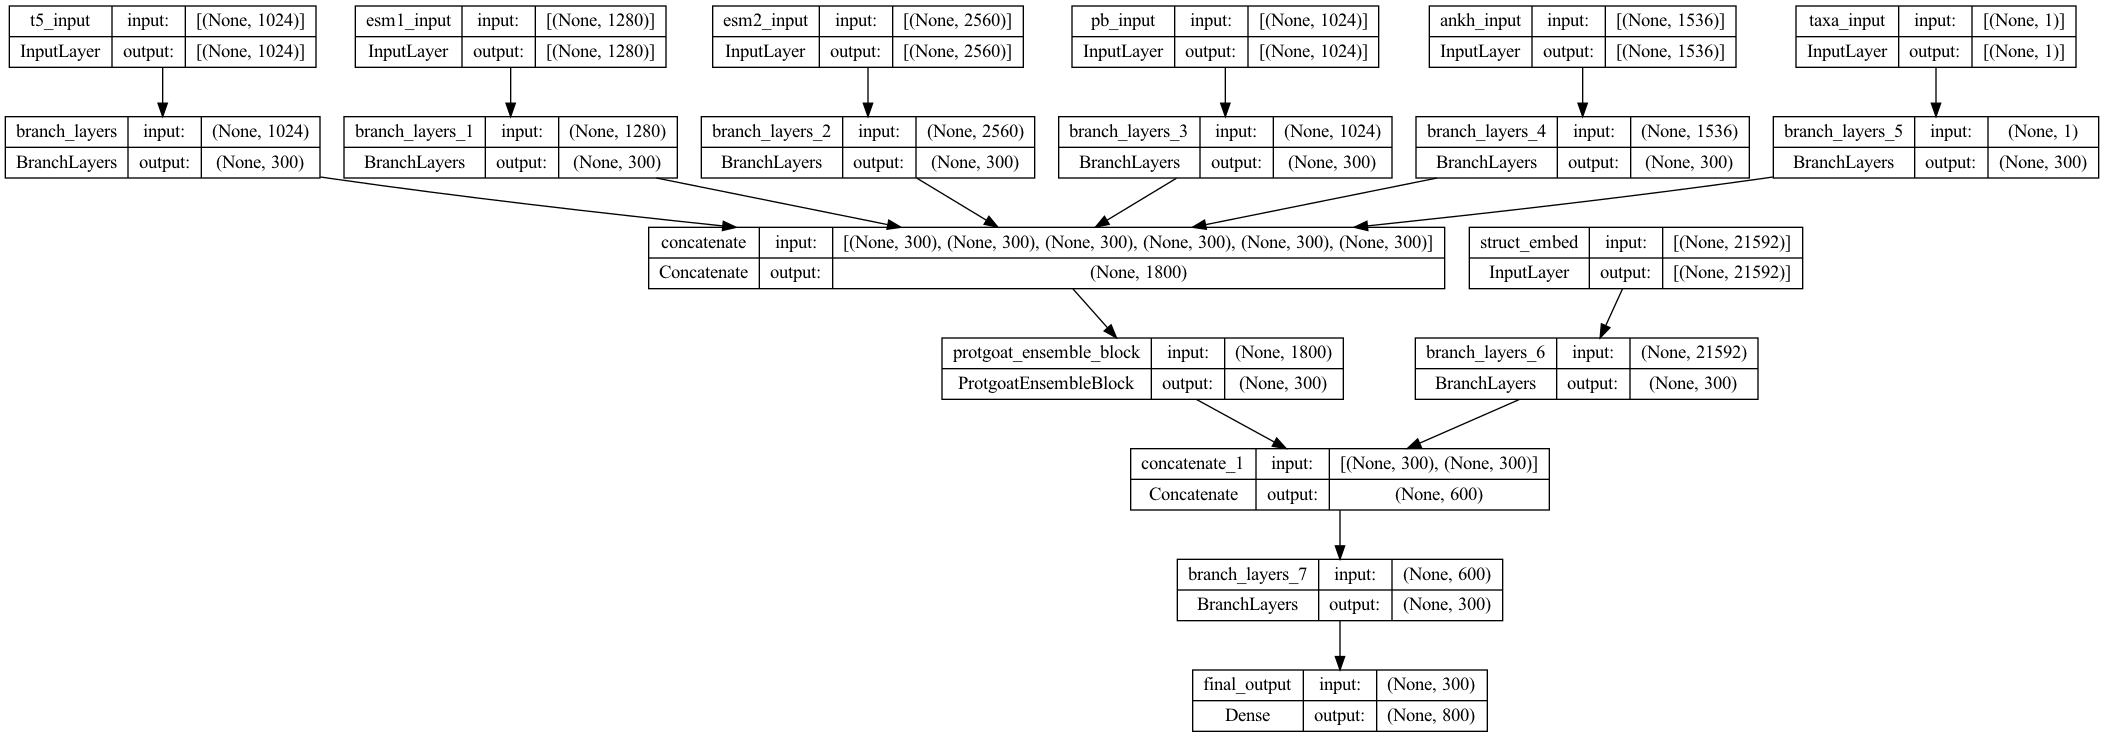

In [42]:
struct_protgoat = create_struct_PROTGOAT(*X_trains, ModelParameters(final_dim=300), ontology_data.n_terms)
plot_model(struct_protgoat, show_shapes=True, show_layer_names=True)

In [ ]:
def plot_specified_model(model_name: str, ontology: str, fold: int, rand_seed: int = 0) -> None:
    # Load the model
    model_path = os.path.join(MODEL_SAVE_DIR, f"{model_name}_{ontology}_fc{fold}_r{rand_seed}.keras")
    model = load_model(model_path)
    # Plot the model
    return plot_model(model, show_shapes=True, show_layer_names=True) # to_file='model.png',

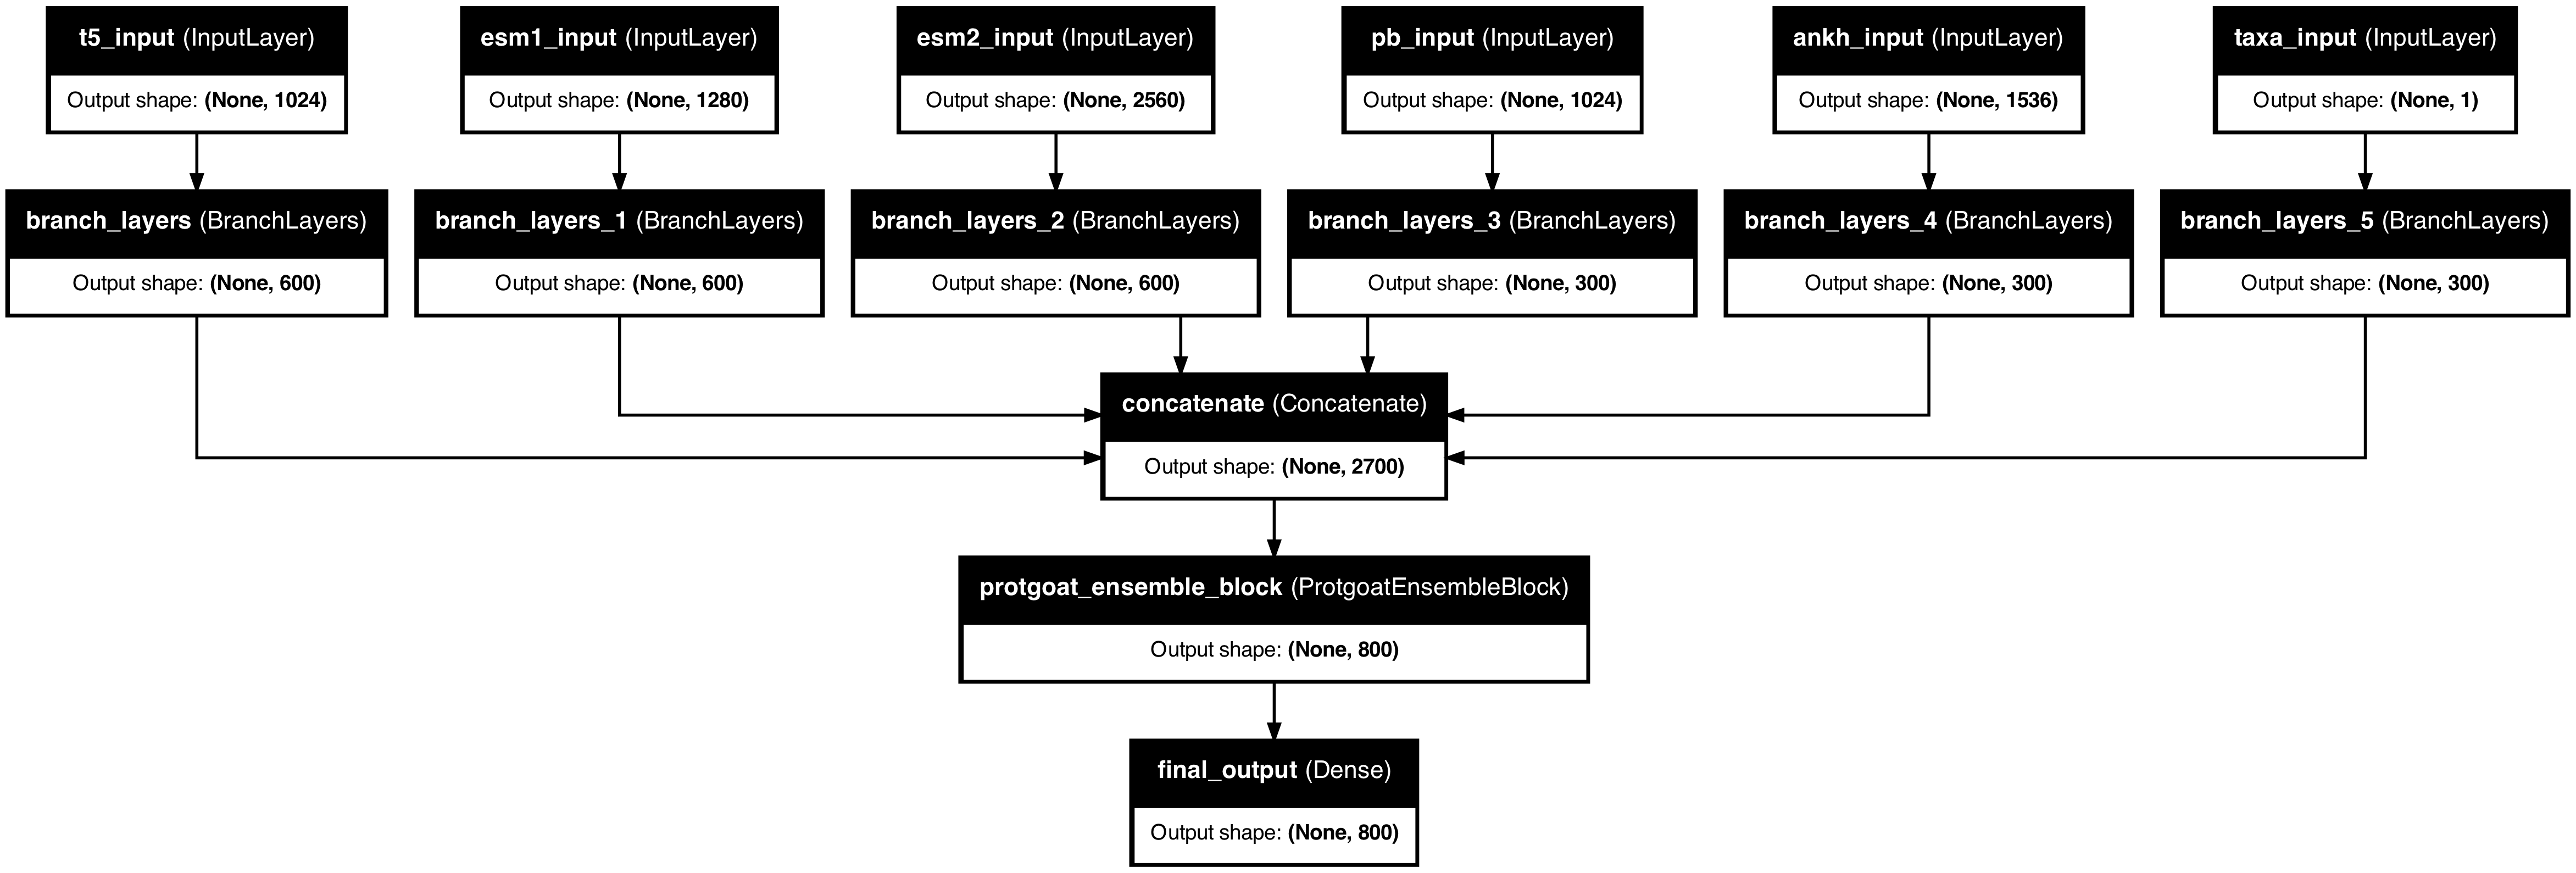

In [ ]:
# Choose the model to plot
plot_specified_model(model_name="struct_protgoat", ontology="CCO", fold=2, rand_seed=0)

## Model Evaluation

The result of the predictions are evaluated following CAFA standards using a special F-max score, as mentioned in the [CAFA-evaluator Github](https://github.com/BioComputingUP/CAFA-evaluator)

It evaluates the performance of prediction methods on targets with hierarchical concept dependencies. It generalizes multi-label evaluation to modern ontologies where the prediction targets are drawn from a directed acyclic graph and achieves high efficiency by leveraging matrix computation and topological sorting.

In [ ]:
# >>> res = cafa_eval("IDPO_disorder_function.obo", "predictions", "ground_truth.tsv")
# >>> write_results(*res)

In [ ]:
def AUPRC(y_test, probas_pred):
    precision, recall, thresholds = precision_recall_curve(y_test, probas_pred)
    return auc(recall, precision)

In [ ]:
ground_truths[0].stack()

,GO:0050896,GO:0008152,GO:0032501,GO:0032502,GO:0065007,GO:0051179,GO:0009987,GO:0071840,GO:0023052,GO:0000003,...,GO:0051775,GO:0042149,GO:0006547,GO:0090659,GO:1901137,GO:1990845,GO:0031325,GO:0034067,GO:0060259,GO:0071887
E7EZG2,0,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Q9VX31,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
O48573,1,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Q10MX2,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F4KB79,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q57ZC7,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
O65370,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Q9CA69,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Q9FFX6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


pd.concat([
    ground_truths[0].stack(),
    ground_truths[1].stack(),
    ground_truths[2].stack(),
]).to_csv("ground_truths.tsv", index=False, header=False, "sep="\t")

In [ ]:
concat_pred_df

,Protein Id,GO Term Id,Prediction
125533,A0A009IHW8,GO:0005622,1.0000
125534,A0A009IHW8,GO:0005737,1.0000
125532,A0A009IHW8,GO:0043226,1.0000
125535,A0A009IHW8,GO:0043227,1.0000
125538,A0A009IHW8,GO:0043229,1.0000
...,...,...,...
91994,X5M5N0,GO:0043229,1.0000
91993,X5M5N0,GO:0043231,1.0000
38928,X5M5N0,GO:0044237,0.7356
18941,X5M5N0,GO:0071704,1.0000
